# ***Loading basis required libraries***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ***Load the dataset***

In [2]:
df = pd.read_csv('/content/train_data.txt', sep = ' ::: ', engine='python', header=None, names=["ID", "TITLE", "GENRE", "DESCRIPTION"])
df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [4]:
df.shape

(54214, 4)

In [5]:
df['GENRE'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

# ***EDA***

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['GENRE_ENCODED'] = le.fit_transform(df['GENRE'])
df.head()

,ID,TITLE,GENRE,DESCRIPTION,GENRE_ENCODED
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,8


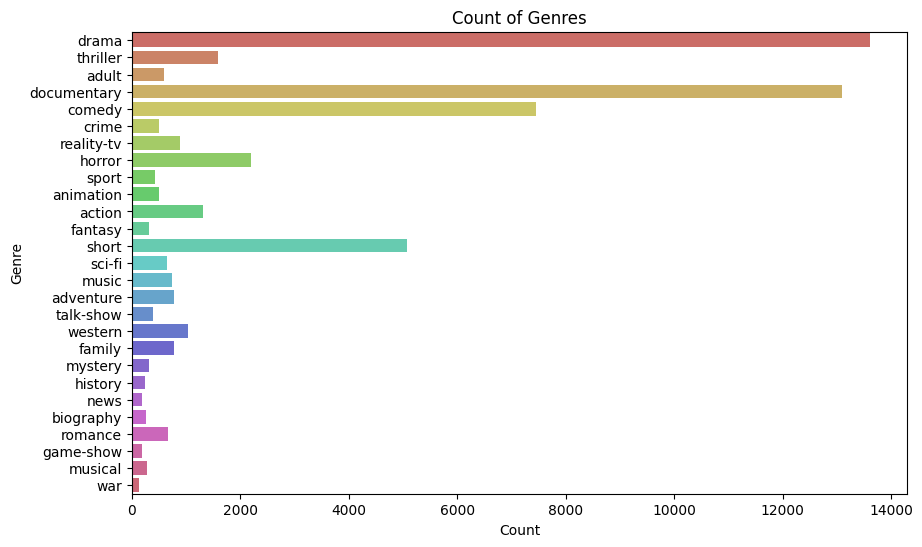

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y=df['GENRE'], palette='hls')
plt.title('Count of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [21]:
def make_lower(text):
    return text.lower()
df['DESCRIPTION'] = df['DESCRIPTION'].apply(make_lower)
df.head()

,ID,TITLE,GENRE,DESCRIPTION,GENRE_ENCODED
0,1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...,8
1,2,Cupid (1997),thriller,a brother and sister with a past incestuous re...,24
2,3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...,1
3,4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...,8
4,5,The Unrecovered (2007),drama,the film's title refers not only to the un-rec...,8


# ***Import the required libraries for Model training***

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df['DESCRIPTION'], df['GENRE_ENCODED'], test_size=0.2, random_state=25, stratify=df['GENRE_ENCODED'])

In [24]:
tfidf = TfidfVectorizer(max_features=20000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [33]:
model1 = LogisticRegression(random_state=25, max_iter=10000, n_jobs=1)
model1.fit(X_train_tfidf, y_train)
y_pred = model1.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5874757908327953
Classification Report:
               precision    recall  f1-score   support

      action       0.53      0.24      0.33       263
       adult       0.67      0.20      0.31       118
   adventure       0.66      0.12      0.21       155
   animation       0.60      0.06      0.11       100
   biography       0.00      0.00      0.00        53
      comedy       0.53      0.60      0.56      1490
       crime       0.33      0.01      0.02       101
 documentary       0.66      0.88      0.75      2619
       drama       0.54      0.80      0.64      2723
      family       0.39      0.04      0.08       157
     fantasy       0.00      0.00      0.00        65
   game-show       0.94      0.44      0.60        39
     history       0.00      0.00      0.00        49
      horror       0.70      0.57      0.63       441
       music       0.62      0.28      0.39       146
     musical       0.00      0.00      0.00        55
     mystery       0.00     

In [27]:
from sklearn.svm import LinearSVC
model2 = LinearSVC()
model2.fit(X_train_tfidf, y_train)

y_pred = model2.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5691229364567002
Classification Report:
               precision    recall  f1-score   support

      action       0.39      0.30      0.34       263
       adult       0.61      0.36      0.45       118
   adventure       0.46      0.21      0.28       155
   animation       0.30      0.13      0.18       100
   biography       0.00      0.00      0.00        53
      comedy       0.52      0.57      0.55      1490
       crime       0.19      0.05      0.08       101
 documentary       0.68      0.81      0.74      2619
       drama       0.55      0.70      0.62      2723
      family       0.28      0.11      0.16       157
     fantasy       0.17      0.05      0.07        65
   game-show       0.81      0.64      0.71        39
     history       0.00      0.00      0.00        49
      horror       0.62      0.61      0.62       441
       music       0.51      0.39      0.44       146
     musical       0.50      0.05      0.10        55
     mystery       0.25     

In [29]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(X_train_tfidf, y_train)

y_pred = model3.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.49128469980632666
Classification Report:
               precision    recall  f1-score   support

      action       1.00      0.00      0.01       263
       adult       0.50      0.01      0.02       118
   adventure       0.50      0.01      0.03       155
   animation       0.00      0.00      0.00       100
   biography       0.00      0.00      0.00        53
      comedy       0.54      0.33      0.41      1490
       crime       0.00      0.00      0.00       101
 documentary       0.55      0.90      0.69      2619
       drama       0.42      0.85      0.57      2723
      family       0.00      0.00      0.00       157
     fantasy       0.00      0.00      0.00        65
   game-show       0.00      0.00      0.00        39
     history       0.00      0.00      0.00        49
      horror       0.86      0.11      0.20       441
       music       0.00      0.00      0.00       146
     musical       0.00      0.00      0.00        55
     mystery       0.00    